In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_2022 = pd.read_csv('data/survey_results_public_2022.csv')
df_2021 = pd.read_csv('data/survey_results_public_2021.csv')
df_2020 = pd.read_csv('data/survey_results_public_2020.csv')
df_2019 = pd.read_csv('data/survey_results_public_2019.csv')
df_2018 = pd.read_csv('data/survey_results_public_2018.csv')
df_2017 = pd.read_csv('data/survey_results_public_2017.csv')

C:\Users\giahu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
lang_20217 = df_2017.HaveWorkedLanguage.str.split(pat=';').explode().str.strip().value_counts().rename('2017', inplace=True)
lang_20218 = df_2018.LanguageWorkedWith.str.split(pat=';').explode().str.strip().value_counts().rename('2018', inplace=True)
ll = pd.concat([lang_20217, lang_20218], axis=1, join="outer")

In [5]:
ll

,2017,2018
JavaScript,22875.0,54686.0
SQL,18754.0,44670.0
Java,14524.0,35521.0
C#,12476.0,26954.0
Python,11704.0,30359.0
PHP,10290.0,24071.0
C++,8155.0,19872.0
C,6974.0,18042.0
TypeScript,3488.0,13626.0
Ruby,3324.0,7911.0


In [6]:
ll['type'] = 'current'

In [ ]:
l2017 = lang_20217.to_frame()
l2017['type'] = 'desire'
l2017

In [25]:
l2017.reset_index(inplace=True)
l2017 = l2017.rename(columns = {'index':'Language'})

In [26]:
l2017

,Language,2017,type
0,JavaScript,22875,desire
1,SQL,18754,desire
2,Java,14524,desire
3,C#,12476,desire
4,Python,11704,desire
5,PHP,10290,desire
6,C++,8155,desire
7,C,6974,desire
8,TypeScript,3488,desire
9,Ruby,3324,desire


In [ ]:
pd.concat([count_lang_2022, count_lang_2021], axis=1, join="outer", names=['2022', '2021'])

In [32]:
def create_dataframe(df, ds, name):
    '''
    INPUT
        df - Data Frame

    OUTPUT
        return newly concat data frame
    '''
    count_ds = ds.str.split(pat=';').explode().str.strip().str.upper().value_counts();
    count_ds.rename(name, inplace=True)
    df = pd.concat([df, count_ds], axis=1, join="outer")

    return df

In [60]:
df_lang_current = pd.DataFrame()

df_lang_current= create_dataframe(df_lang_current, df_2017.HaveWorkedLanguage, 2017)
df_lang_current= create_dataframe(df_lang_current, df_2018.LanguageWorkedWith, 2018)
df_lang_current= create_dataframe(df_lang_current, df_2019.LanguageWorkedWith, 2019)
df_lang_current= create_dataframe(df_lang_current, df_2020.LanguageWorkedWith, 2020)
df_lang_current= create_dataframe(df_lang_current, df_2021.LanguageHaveWorkedWith, 2021)
df_lang_current= create_dataframe(df_lang_current, df_2022.LanguageHaveWorkedWith, 2022)

df_lang_desire = pd.DataFrame()
df_lang_desire= create_dataframe(df_lang_desire, df_2017.WantWorkLanguage, '2017')
df_lang_desire= create_dataframe(df_lang_desire, df_2018.LanguageDesireNextYear, '2018')
df_lang_desire= create_dataframe(df_lang_desire, df_2019.LanguageDesireNextYear, '2019')
df_lang_desire= create_dataframe(df_lang_desire, df_2020.LanguageDesireNextYear, '2020')
df_lang_desire= create_dataframe(df_lang_desire, df_2021.LanguageWantToWorkWith, '2021')
df_lang_desire= create_dataframe(df_lang_desire, df_2022.LanguageWantToWorkWith, '2022')


In [41]:
df_lang_current['Type'] = 'Current'

In [42]:
df_lang_desire['Type'] = 'Desire'

In [54]:
df_lang = pd.concat([df_lang_current, df_lang_desire])

In [55]:
df_lang

,2017,2018,2019,2020,2021,2022,Type
JAVASCRIPT,22875.0,54686.0,59219.0,38822.0,53587.0,46443.0,Current
SQL,18754.0,44670.0,47544.0,31413.0,38835.0,35127.0,Current
JAVA,14524.0,35521.0,35917.0,23074.0,29162.0,23644.0,Current
C#,12476.0,26954.0,27097.0,18041.0,22984.0,19883.0,Current
PYTHON,11704.0,30359.0,36443.0,25287.0,39792.0,34155.0,Current
...,...,...,...,...,...,...,...
CRYSTAL,NaN,NaN,NaN,NaN,790.0,510.0,Desire
APL,NaN,NaN,NaN,NaN,568.0,608.0,Desire
SOLIDITY,NaN,NaN,NaN,NaN,NaN,2606.0,Desire
FORTRAN,NaN,NaN,NaN,NaN,NaN,439.0,Desire


In [56]:
df_lang = df_lang[['Type', '2017','2018','2019','2020','2021','2022']]

In [62]:
df_lang_desire

,2017,2018,2019,2020,2021,2022
JAVASCRIPT,16327.0,38465.0,44739.0,26188.0,37008.0,31551.0
PYTHON,12570.0,32795.0,40006.0,26682.0,34929.0,29350.0
SQL,11217.0,28011.0,33566.0,19970.0,26631.0,24804.0
C#,10187.0,20419.0,22449.0,13674.0,17999.0,15681.0
JAVA,9988.0,22556.0,23508.0,13264.0,17222.0,13345.0
C++,7647.0,15289.0,16856.0,9756.0,15249.0,11896.0
GO,5770.0,15529.0,17060.0,12605.0,15788.0,15500.0
TYPESCRIPT,5692.0,16896.0,23720.0,17150.0,26905.0,26050.0
PHP,5365.0,12244.0,12837.0,7106.0,8852.0,7325.0
C,4841.0,10316.0,11143.0,6091.0,9702.0,7856.0


In [38]:
df_lang.loc['BASH/SHELL/POWERSHELL'] = df_lang.loc[['BASH/SHELL/POWERSHELL', 'BASH/SHELL']].sum()

In [39]:
df_lang.drop(labels=['HTML', 'CSS', 'OTHER(S):', 'BASH/SHELL'], inplace=True)

In [ ]:
df_lang.replace(np.nan,0)

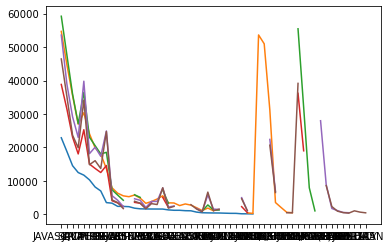

In [63]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(df_lang_current)  # Plot some data on the axes.